In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train,y_train), (x_test, y_test)= datasets.cifar10.load_data()
x_train, x_test= x_train/255.0, x_test/255.0

In [3]:
class_names = [
    "airplane",   
    "automobile", 
    "bird",       
    "cat",
    "deer",       
    "dog",        
    "frog",       
    "horse",      
    "ship",       
    "truck"       
]

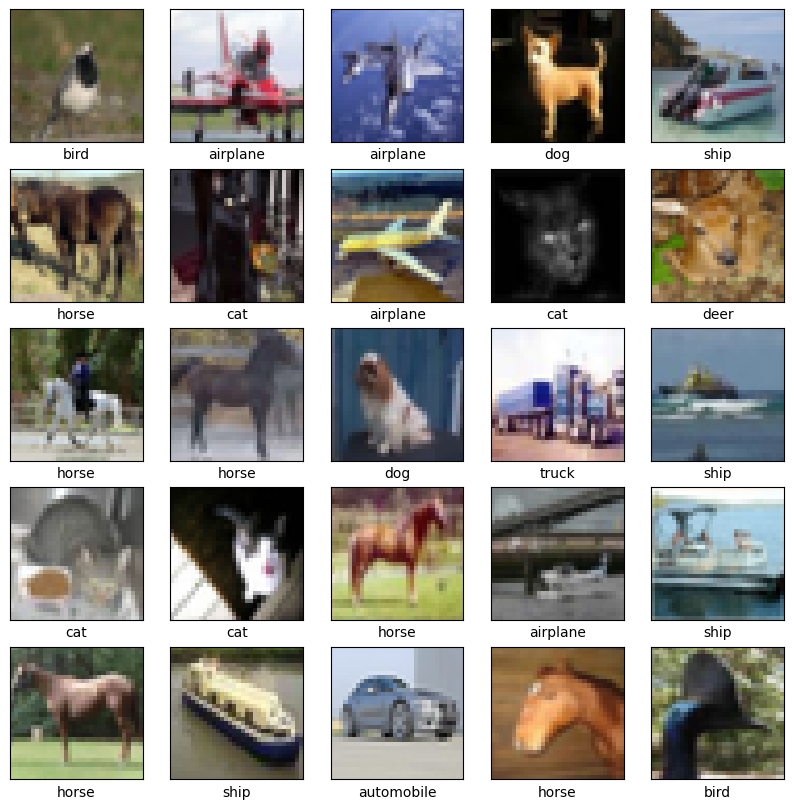

In [4]:
idxs = np.random.choice(len(x_train), 25, replace=False)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(idxs):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(x_train[idx])                             
    plt.xlabel(class_names[int(y_train[idx])])           
plt.show()


In [5]:
#building the cnn model 
model= models.Sequential([
    layers.Conv2D (32, (3,3), activation= 'relu', input_shape=(32,32,3)), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,             
    restore_best_weights=True  
)

In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [19]:
#Training the model 
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    steps_per_epoch= len(x_train)//64, 
                    callbacks=[early_stop] 
                   )

Epoch 1/30
781/781 [==============================] - 57s 74ms/step - loss: 0.8046 - accuracy: 0.7206 - val_loss: 0.7344 - val_accuracy: 0.7534
Epoch 2/30
781/781 [==============================] - 44s 56ms/step - loss: 0.7838 - accuracy: 0.7220 - val_loss: 0.6834 - val_accuracy: 0.7634
Epoch 3/30
781/781 [==============================] - 47s 60ms/step - loss: 0.7699 - accuracy: 0.7327 - val_loss: 0.6882 - val_accuracy: 0.7644
Epoch 4/30
781/781 [==============================] - 50s 64ms/step - loss: 0.7706 - accuracy: 0.7312 - val_loss: 0.6336 - val_accuracy: 0.7858
Epoch 5/30
781/781 [==============================] - 49s 63ms/step - loss: 0.7610 - accuracy: 0.7353 - val_loss: 0.6541 - val_accuracy: 0.7724
Epoch 6/30
781/781 [==============================] - 53s 68ms/step - loss: 0.7448 - accuracy: 0.7398 - val_loss: 0.7003 - val_accuracy: 0.7642
Epoch 7/30
781/781 [==============================] - 61s 78ms/step - loss: 0.7383 - accuracy: 0.7436 - val_loss: 0.5969 - val_accuracy:

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

313/313 - 3s - loss: 0.6970 - accuracy: 0.7589

Test accuracy: 0.759
Test loss: 0.697


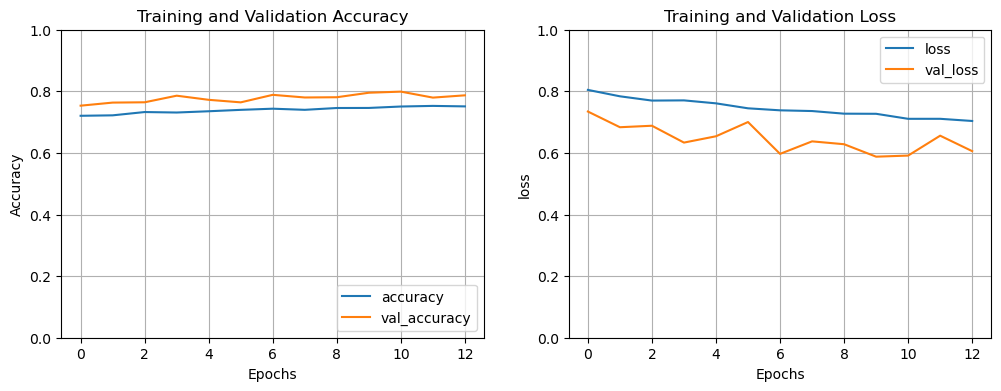

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()